# Level 1

Standard Deviation

In [38]:
import pandas as pd
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv('data.csv', header=None)

# Perform PCA on the preprocessed data with 2 principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

# Get the standard deviations of the two resulting dimensions
std_devs = pca.explained_variance_

# Round the standard deviations to two decimal places
std_devs_rounded = [round(sd, 2) for sd in std_devs]

# Print the rounded standard deviations
print('Standard deviations of the two resulting dimensions:')
print(', '.join(map(str, std_devs_rounded)))

Standard deviations of the two resulting dimensions:
3.88, 1.0


# Level 2

Password

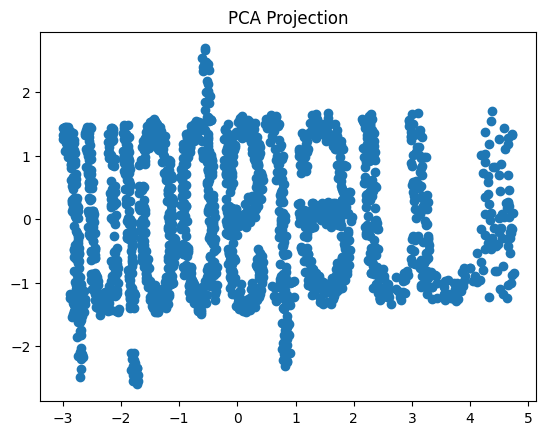

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data 
df = pd.read_csv('data.csv')

# Perform PCA on the preprocessed data with 2 principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

# Create a new DataFrame with the 2 principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Plot the two-dimensional data
plt.scatter(principalDf['PC1'], principalDf['PC2'])
plt.title('PCA Projection')
plt.show()

# Level 3

Cleaning Data

In [40]:
import pandas as pd

# Load the training data from CSV into a pandas DataFrame
train_data = pd.read_csv('train_data.csv')

# Find and remove rows with NaN values
train_data = train_data.dropna()

# Find and remove rows with outliers
outlier_mask = ((train_data['AMPS'] < 0) | (train_data['AMPS'] > 1) | 
                (train_data['VOLTS'] < 0.02) | (train_data['VOLTS'] > 8.7) |
                (train_data['TEMP'] < -100) | (train_data['TEMP'] > 373.15) |
                (train_data['DELTA'] < -1) | (train_data['DELTA'] > 1) |
                (train_data['GAMMA'] < -2) | (train_data['GAMMA'] > 2) |
                (train_data['OUTPUT'] < -8.4) | (train_data['OUTPUT'] > 9.3))
train_data = train_data[~outlier_mask]

print('Number of rows remaining in the cleaned training data:', len(train_data))

Number of rows remaining in the cleaned training data: 971


# Level 4

Convert data: Kelvin to Celsius



In [41]:
# convert all Kelvin temperature values to Celsius
train_data.loc[train_data['UNIT'] == 'K', 'TEMP'] -= 273.15
train_data['UNIT'].replace({'K': 'C'}, inplace=True)

# calculate the mean and standard deviation
values = train_data.loc[train_data['UNIT'] == 'C', 'TEMP']
mean = round(values.mean(), 2)
std = round(values.std(ddof=0), 0)

print(f"Mean Celsius: {mean}")
print(f"Standard Deviation Celsius: {std}")

# prepare data for training by replacing ? values to C
train_data.loc[train_data['TEMP'] > 100, 'TEMP'] = train_data.loc[train_data['TEMP'] > 100, 'TEMP'] - 273.15
train_data.loc[train_data['UNIT'] == '?', 'UNIT'] = 'C'

Mean Celsius: -1.57
Standard Deviation Celsius: 46.0


<ipython-input-41-04ead8f6b8db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['UNIT'].replace({'K': 'C'}, inplace=True)


# Level 5

Predict using test_data

In [42]:
import pandas as pd
import numpy as np

# Load the training data from CSV into a pandas DataFrame
train_data = pd.read_csv('train_data.csv')
# Load the training data from CSV into a pandas DataFrame
test_data = pd.read_csv('test_data.csv')

# Find and remove rows with NaN values
train_data = train_data.dropna()

# Find and remove rows with outliers
outlier_mask = ((train_data['AMPS'] < 0) | (train_data['AMPS'] > 1) |
                (train_data['VOLTS'] < 0.02) | (train_data['VOLTS'] > 8.7) |
                (train_data['TEMP'] < -100) | (train_data['TEMP'] > 373.15) |
                (train_data['DELTA'] < -1) | (train_data['DELTA'] > 1) |
                (train_data['GAMMA'] < -2) | (train_data['GAMMA'] > 2) |
                (train_data['OUTPUT'] < -8.4) | (train_data['OUTPUT'] > 9.3))
train_data = train_data[~outlier_mask]

mean_temp = train_data.loc[train_data['UNIT'] == 'C', 'TEMP'].mean()
mean_kelvin = train_data.loc[train_data['UNIT'] == 'K', 'TEMP'].mean()

# get the minimum and maximum values of the 'TEMP' column in Kelvin
min_temp_k = train_data.loc[train_data['UNIT'] == 'K', 'TEMP'].min()
max_temp_k = train_data.loc[train_data['UNIT'] == 'K', 'TEMP'].max()

# get the minimum and maximum values of the 'TEMP' column in Celsius
min_temp_c = train_data.loc[train_data['UNIT'] == 'C', 'TEMP'].min()
max_temp_c = train_data.loc[train_data['UNIT'] == 'C', 'TEMP'].max()

# convert all Kelvin temperature values to Celsius
train_data.loc[train_data['UNIT'] == 'K', 'TEMP'] -= 273.15
train_data['UNIT'].replace({'K': 'C'}, inplace=True)

train_data.loc[train_data['TEMP'] > 100, 'TEMP'] = train_data.loc[train_data['TEMP'] > 100, 'TEMP'] - 273.15
train_data.loc[train_data['UNIT'] == '?', 'UNIT'] = 'C'

from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
encoder = LabelEncoder()

# loop through each column in the dataframe
for col in train_data.columns:
    # check if the column data type is object (i.e. string)
    if train_data[col].dtype == 'object':
        # encode the column using the LabelEncoder object
        train_data[col] = encoder.fit_transform(train_data[col])

        # loop through each column in the dataframe
for col in test_data.columns:
    # check if the column data type is object (i.e. string)
    if test_data[col].dtype == 'object':
        # encode the column using the LabelEncoder object
        test_data[col] = encoder.fit_transform(test_data[col])

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into training and validation sets
train_set = train_data.sample(frac=0.8, random_state=0)
valid_set = train_data.drop(train_set.index)

# Define the input features and the target variable
features = ['MODE','POWER','AMPS', 'VOLTS', 'TEMP', 'DELTA', 'GAMMA']
target = 'OUTPUT'

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(train_set[features], train_set[target])

# Make predictions on the test set
test_pred = rf_model.predict(test_data[features])

# Round the predictions to 3 decimal places
test_pred_rounded = np.round(test_pred, 3)

# Save the predictions to a file  
np.savetxt('/content/test_predictions.csv', test_pred, fmt='%.3f', delimiter='\n')

# Level 7

Making a heatmap do visualize the hidden password from the predictions

<Axes: >

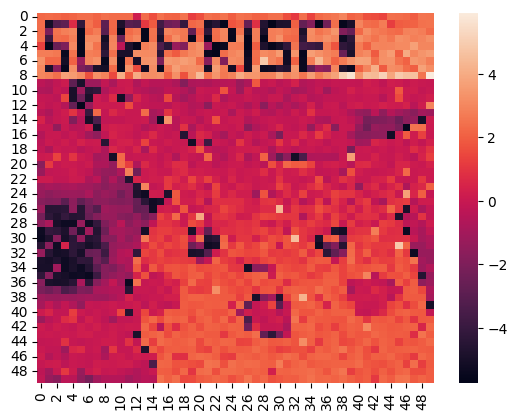

In [44]:
import pandas as pd
import seaborn as sbn

# Load the predicted values from the CSV file
test_predictions = pd.read_csv('test_predictions.csv', header=None)

# Reshape the predicted values into a 50 by 50 grid
test_predictions_grid = test_predictions.values.reshape((50, 50))

# Create a heatmap of the predicted values
sbn.heatmap(test_predictions_grid)

# Level 8+ 

Making a model that becomes better at predicting 💻

In [45]:
import pandas as pd
import numpy as np

# Load the training data from CSV into a pandas DataFrame
train_data = pd.read_csv('train_data.csv')
# Load the training data from CSV into a pandas DataFrame
test_data = pd.read_csv('test_data.csv')

# Find and remove rows with NaN values
train_data = train_data.dropna()

# Find and remove rows with outliers
outlier_mask = ((train_data['AMPS'] < 0) | (train_data['AMPS'] > 1) |
                (train_data['VOLTS'] < 0.02) | (train_data['VOLTS'] > 8.7) |
                (train_data['TEMP'] < -100) | (train_data['TEMP'] > 373.15) |
                (train_data['DELTA'] < -1) | (train_data['DELTA'] > 1) |
                (train_data['GAMMA'] < -2) | (train_data['GAMMA'] > 2) |
                (train_data['OUTPUT'] < -8.4) | (train_data['OUTPUT'] > 9.3))
train_data = train_data[~outlier_mask]

mean_temp = train_data.loc[train_data['UNIT'] == 'C', 'TEMP'].mean()
mean_kelvin = train_data.loc[train_data['UNIT'] == 'K', 'TEMP'].mean()

# get the minimum and maximum values of the 'TEMP' column in Kelvin
min_temp_k = train_data.loc[train_data['UNIT'] == 'K', 'TEMP'].min()
max_temp_k = train_data.loc[train_data['UNIT'] == 'K', 'TEMP'].max()

# get the minimum and maximum values of the 'TEMP' column in Celsius
min_temp_c = train_data.loc[train_data['UNIT'] == 'C', 'TEMP'].min()
max_temp_c = train_data.loc[train_data['UNIT'] == 'C', 'TEMP'].max()

# convert all Kelvin temperature values to Celsius
train_data.loc[train_data['UNIT'] == 'K', 'TEMP'] -= 273.15
train_data['UNIT'].replace({'K': 'C'}, inplace=True)

train_data.loc[train_data['TEMP'] > 100, 'TEMP'] = train_data.loc[train_data['TEMP'] > 100, 'TEMP'] - 273.15
train_data.loc[train_data['UNIT'] == '?', 'UNIT'] = 'C'

from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
encoder = LabelEncoder()

# loop through each column in the dataframe
for col in train_data.columns:
    # check if the column data type is object (i.e. string)
    if train_data[col].dtype == 'object':
        # encode the column using the LabelEncoder object
        train_data[col] = encoder.fit_transform(train_data[col])

        # loop through each column in the dataframe
for col in test_data.columns:
    # check if the column data type is object (i.e. string)
    if test_data[col].dtype == 'object':
        # encode the column using the LabelEncoder object
        test_data[col] = encoder.fit_transform(test_data[col])

In [ ]:
#Training the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError
from keras import regularizers
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import regularizers

# Split the data into input (X) and output (y) data
X = train_data.drop("OUTPUT", axis=1) 
y = train_data["OUTPUT"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=36)

# Preprocess the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    keras.layers.Dense(32, activation="relu"),
    BatchNormalization(),
    keras.layers.Dense(16, activation="relu"),
    BatchNormalization(),
    keras.layers.Dense(1)
])

model.compile(loss=MeanSquaredError(), optimizer="adam", metrics=[MeanSquaredError(), "mean_absolute_error" ])

history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_data=(X_val, y_val))

In [47]:
#Predict and save the results
X_test = scaler.transform(test_data)
test_predictions = model.predict(X_test)

# Print and save the predicted output values
print(test_predictions)
print(min(test_predictions))
print(max(test_predictions))

np.savetxt('/content/test_predictions_very_last.csv', test_predictions, delimiter='\n')

79/79 [==============================] - 0s 2ms/step
[[1.8228108]
 [3.29715  ]
 [3.0006213]
 ...
 [1.8096554]
 [2.085819 ]
 [2.239818 ]]
[-6.7634797]
[8.560371]
